## Observations and Insights 

In [1]:
#Observations
# - There is a strong correlation between mouse weight and tumor volume in the Caopmulin results, the heavier the mouse the more likely they are to have a larger tumor
# - Looking at these results Ramicane stands out as another promising treatment with similar average final tumor size to Capomulin and a slightly lower median and variance
# - Propriva has significantly less data points than the other drugs. Why is this? Are the mice not surviving for the full 45 days or is this sloppy record keeping? 


In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Check for Null/missing values
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
#Checking for duplicated mice
mice_dups = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]

#define duplicated mice
bad_mouse = mice_dups['Mouse ID'].iloc[0]

# Create a clean DataFrame by dropping the duplicate mouse
clean_mouse_study = mouse_study.loc[mouse_study["Mouse ID"] != bad_mouse, :]
clean_mouse_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#create dataframe that looks at individual mice and final tumor volume
grouped_mouse_id = clean_mouse_study.groupby("Mouse ID")
max_timepoint = grouped_mouse_id["Timepoint"].max().to_frame()
max_timepoint
final_tumor = pd.merge(max_timepoint, mouse_study, on=["Mouse ID", "Timepoint"], how="left")
final_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [7]:
# Checking the number of mice in the clean DataFrame.
final_tumor.count()

Mouse ID              248
Timepoint             248
Drug Regimen          248
Sex                   248
Age_months            248
Weight (g)            248
Tumor Volume (mm3)    248
Metastatic Sites      248
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

grouped_by_drug = clean_mouse_study.groupby("Drug Regimen")

drug_mean = grouped_by_drug["Tumor Volume (mm3)"].mean()
drug_median = grouped_by_drug["Tumor Volume (mm3)"].median()
drug_var = grouped_by_drug["Tumor Volume (mm3)"].var()
drug_stdv = grouped_by_drug["Tumor Volume (mm3)"].std()
drug_sem = grouped_by_drug["Tumor Volume (mm3)"].sem()

drug_summary_df = pd.DataFrame({"mean": drug_mean,
                      "median": drug_median,
                      "variance": drug_var,
                      "standard deviation": drug_stdv,
                      "SEM ": drug_sem})
drug_summary_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [9]:
# number of data points for each treatment regimen
drug_regimens = clean_mouse_study["Drug Regimen"].value_counts().to_frame()
drug_regimens.columns = ["Counts"]
drug_regimens

,Counts
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,148


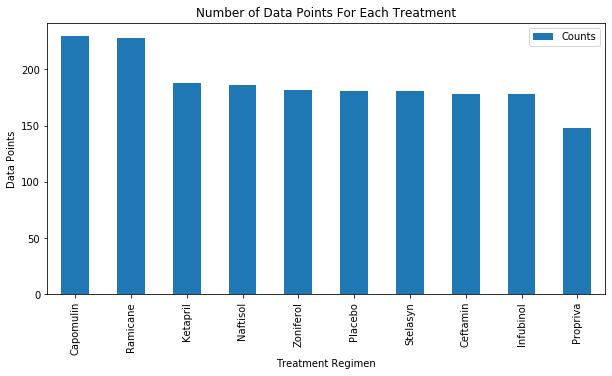

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_regimens.plot(kind='bar', figsize=(10,5))
plt.title("Number of Data Points For Each Treatment")
plt.xlabel("Treatment Regimen")
plt.ylabel("Data Points")

plt.show()

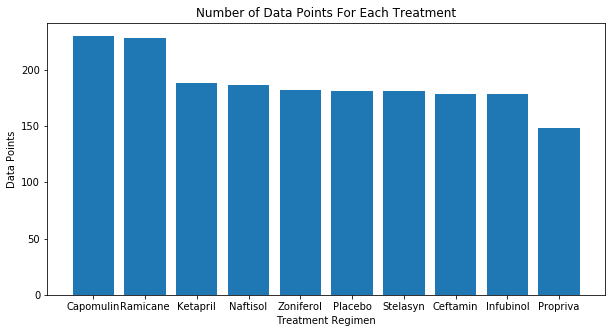

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_counts = drug_regimens["Counts"].to_list()
regimens = drug_regimens.index.values.tolist()

plt.figure(figsize=(10,5))
plt.bar(regimens, regimen_counts, align="center")
plt.title("Number of Data Points For Each Treatment")
plt.xlabel("Treatment Regimen")
plt.ylabel("Data Points")

plt.show()

##needs formating

## Pie Plots

In [12]:
# Need distribution of female versus male mice
gender_counts = final_tumor["Sex"].value_counts().to_frame()
gender_counts.columns = ["Counts"]
gender_counts.head()

,Counts
Male,125
Female,123


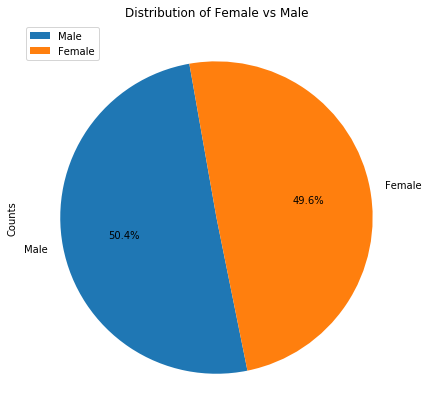

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts.plot(kind='pie', subplots=True, autopct="%1.1f%%", startangle=100, figsize=(6, 6))

plt.title("Distribution of Female vs Male")
plt.tight_layout()

plt.show()

#formating

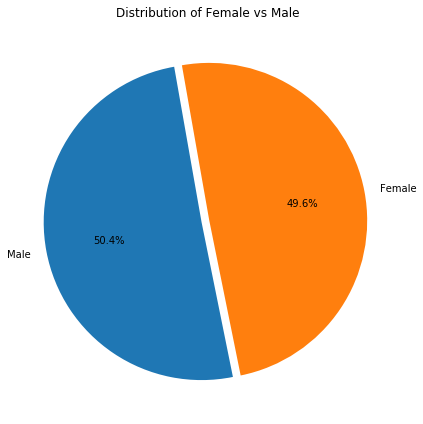

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = gender_counts["Counts"].to_list()
gender = gender_counts.index.values.tolist()
explode = (0.05, 0,)

plt.figure(figsize=(6,6))
plt.pie(counts, explode=explode, labels=gender, autopct="%1.1f%%", startangle=100)
plt.axis('equal')
plt.title("Distribution of Female vs Male")
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Need final tumor volume of each mouse across four of the most promising treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin

caopmulin_results = final_tumor.loc[final_tumor["Drug Regimen"] == "Capomulin", :]
Ramicane_results = final_tumor.loc[final_tumor["Drug Regimen"] == "Ramicane", :]
Infubinol_results = final_tumor.loc[final_tumor["Drug Regimen"] == "Infubinol", :]
Ceftamin_results = final_tumor.loc[final_tumor["Drug Regimen"] == "Ceftamin", :]


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
quartiles = caopmulin_results['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for caopmulin is: {lowerq}")
print(f"The upper quartile of tumor volume for caopmulin is: {upperq}")
print(f"The interquartile range of tumor volume for caopmulin is: {iqr}")
print(f"The the median of tumor volume for caopmulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = caopmulin_results.loc[(caopmulin_results['Tumor Volume (mm3)'] < lower_bound) | (caopmulin_results['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume


The lower quartile of tumor volume for caopmulin is: 32.37735684
The upper quartile of tumor volume for caopmulin is: 40.1592203
The interquartile range of tumor volume for caopmulin is: 7.781863460000004
The the median of tumor volume for caopmulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ramicane
quartiles = Ramicane_results['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ramicane is: {lowerq}")
print(f"The upper quartile of tumor volume for Ramicane is: {upperq}")
print(f"The interquartile range of tumor volume for Ramicane is: {iqr}")
print(f"The the median of tumor volume for Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = Ramicane_results.loc[(Ramicane_results['Tumor Volume (mm3)'] < lower_bound) | (Ramicane_results['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume

The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
The the median of tumor volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Infubinol
quartiles = Infubinol_results['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Infubinol is: {lowerq}")
print(f"The upper quartile of tumor volume for Infubinol is: {upperq}")
print(f"The interquartile range of tumor volume for Infubinol is: {iqr}")
print(f"The the median of tumor volume for Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = Infubinol_results.loc[(Infubinol_results['Tumor Volume (mm3)'] < lower_bound) | (Infubinol_results['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume

The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
The interquartile range of tumor volume for Infubinol is: 11.477135160000003
The the median of tumor volume for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ceftamin
quartiles = Ceftamin_results['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ceftamin is: {lowerq}")
print(f"The upper quartile of tumor volume for Ceftamin is: {upperq}")
print(f"The interquartile range of tumor volume for Ceftamin is: {iqr}")
print(f"The the median of tumor volume for Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = Ceftamin_results.loc[(Ceftamin_results['Tumor Volume (mm3)'] < lower_bound) | (Ceftamin_results['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume

The lower quartile of tumor volume for Ceftamin is: 48.72207785
The upper quartile of tumor volume for Ceftamin is: 64.29983003
The interquartile range of tumor volume for Ceftamin is: 15.577752179999997
The the median of tumor volume for Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


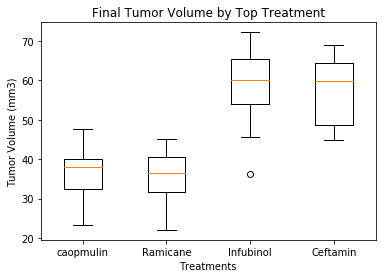

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Top Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Treatments')
ax.boxplot([caopmulin_results["Tumor Volume (mm3)"], Ramicane_results["Tumor Volume (mm3)"],\
            Infubinol_results["Tumor Volume (mm3)"], Ceftamin_results["Tumor Volume (mm3)"]])
plt.xticks([1, 2, 3, 4], ['caopmulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

In [21]:
#need Caopmulin dataframe with difference timepoints for each mouse since we are looking at avg tumor volume over time

caopmulin_results_over_time = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin"), :]
caopmulin_results_over_time = caopmulin_results_over_time.set_index("Mouse ID")
caopmulin_results_over_time.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0


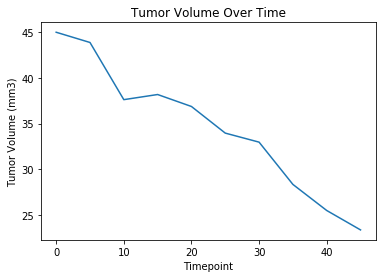

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = "s185"

one_mouse_caopmulin_results = caopmulin_results_over_time.loc[mouse_id]


plt.plot(one_mouse_caopmulin_results["Timepoint"],one_mouse_caopmulin_results["Tumor Volume (mm3)"])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time')
plt.show()

In [23]:
#calculate averages for Caopmulin results
caopmulin_results_averages = caopmulin_results_over_time.groupby("Mouse ID")
caopmulin_results_averages = caopmulin_results_averages.mean()
caopmulin_results_averages.head()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


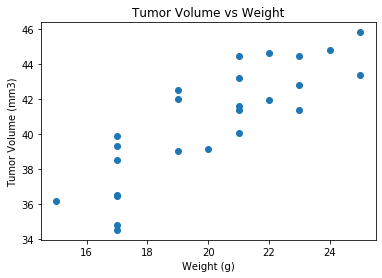

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(caopmulin_results_averages["Weight (g)"],caopmulin_results_averages["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')
plt.show()


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = caopmulin_results_averages["Weight (g)"]
tumor_vol = caopmulin_results_averages["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84


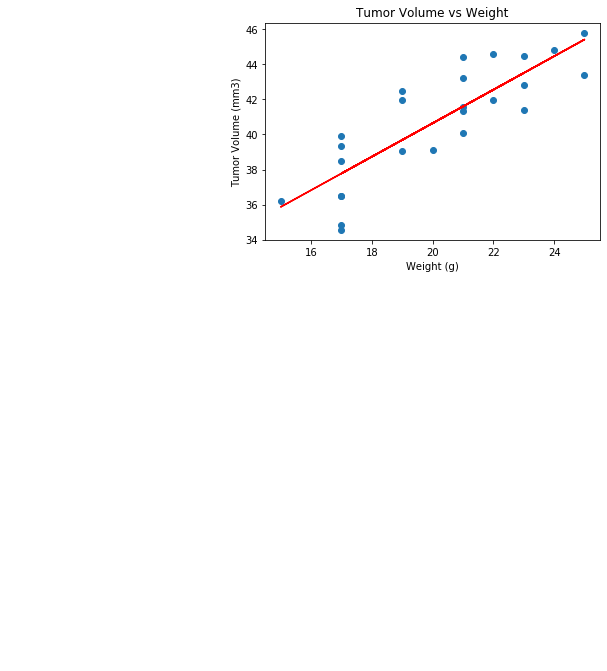

In [26]:
# Calculate the correlation coefficient and linear regression model
x_values = caopmulin_results_averages["Weight (g)"]
y_values = caopmulin_results_averages["Tumor Volume (mm3)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')
plt.show()